# Cross Validation Type Visualisation

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
from sklearn import datasets
from sklearn import svm
import os, sys, plotly.graph_objects as go
module_path = os.path.abspath(os.path.join('../../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from erudition.learning.helpers.plots.plotly_render import render, scatter, bar, shape_rect

In [25]:
X = np.random.randn(100, 10)

percentiles_classes = [10,30,60]
y = np.hstack([[i] * perc for i, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[i] * 10 for i in range(10)])

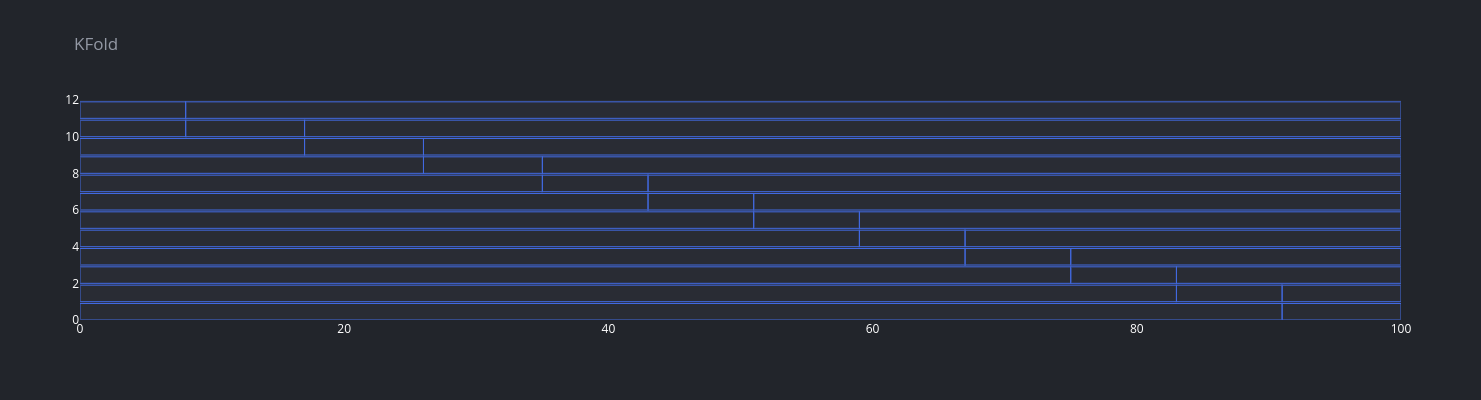

In [33]:
import plotly.graph_objects as go

cv = KFold(n_splits=12)

indexes = []

def plot_cv_indices(cv, X, y, group):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        indexes.append(np.where(indices[:-1] != indices[1:])[0])
        
plot_cv_indices(cv, X, y, group)

fig = go.Figure()

cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

# Set axes properties
fig.update_xaxes(range=[0, 100], showgrid=False)
fig.update_yaxes(range=[0, len(indexes)], showgrid=False)

fold = 0
start_col = 0

for idx in reversed(indexes):
    fig.add_shape(shape_rect(0,idx[0],fold,fold+0.9, fill_color=cols[0], line_width=1))
    if (len(idx) > 1):
        for sub_idx in idx[1:]:
            fig.add_shape(shape_rect(idx[0],sub_idx,fold,fold+0.9, fill_color=cols[0], line_width=1))
            last_sub = sub_idx
    else:
        last_sub = idx[0]          
    se = fig.add_shape(shape_rect(last_sub,100,fold, fold+0.9, fill_color=cols[2], line_width=1)) 
    fold+=1
    start_col = 1
    
fig.update_shapes(dict(xref='x', yref='y'))
render(fig, str(cv.__class__.__name__), height=400, width=900)